In [1]:
# Load dependencies
import pandas as pd,\
  linearmodels as lm,\
  statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data, remove rows with missing values, create a date type column
df = pd.read_csv("/Users/hpone/Desktop/NUS MSBA/DBA5101/Grp Prj 2/DiD_data.csv")
df.dropna(inplace=True)
df['date_parsed'] =  pd.to_datetime(df['rssd9999'], format='%Y%m%d')
# Add column for different periods
df['after_2007'] = 1
df.loc[df['date_parsed'] <= '2006-12-31','after_2007'] = 0

In [3]:
# Get average of mean trading ratio per bank BEFORE
df_bank_means_before= df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_before.rename(columns={"bhc_avgtradingratio": "affect_before"}, inplace=True)
#df_bank_means_before['affect_after'] = df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
# Get average of mean trading ratio per bank AFTER
df_bank_means_after= df[df['after_DFA_1']==1].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_after.rename(columns={"bhc_avgtradingratio": "affect_after"}, inplace=True)

# 2007
df_bank_means_before_2007= df[df['after_2007']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_before_2007.rename(columns={"bhc_avgtradingratio": "affect_before_2007"}, inplace=True)
#df_bank_means_before['affect_after'] = df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
# Get average of mean trading ratio per bank AFTER
df_bank_means_after_2007= df[df['after_2007']==1].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_after_2007.rename(columns={"bhc_avgtradingratio": "affect_after_2007"}, inplace=True)

In [4]:
# merge to the bank means before
df_combined = df_bank_means_before.merge(df_bank_means_after, on='rssd9001', how='inner')
df_combined_2007 = df_bank_means_before_2007.merge(df_bank_means_after_2007, on='rssd9001', how='inner')
df_combined_2007

,rssd9001,affect_before_2007,affect_after_2007
0,1020180,0.000000,0.000000
1,1020340,0.011551,0.017922
2,1020676,0.000000,0.000000
3,1020902,0.025593,0.011298
4,1021682,0.000000,0.000000
...,...,...,...
1217,3432965,0.000000,0.000000
1218,3438079,0.000000,0.000000
1219,3438097,0.000000,0.000000
1220,3444847,0.000000,0.000000


In [5]:
df_combined['diff_of_trading_means'] = df_combined['affect_after'] - df_combined['affect_before']
df_combined_2007['diff_of_trading_means_2007'] = df_combined_2007['affect_after_2007'] - df_combined_2007['affect_before_2007']
df_combined_2007['affect_2007'] = 0
df_combined_2007.loc[df_combined_2007['affect_before_2007'] >= 0.03,'affect_2007'] = 1

In [6]:
df_combined_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
0,1020180,0.000000,0.000000,0.000000,0
1,1020340,0.011551,0.017922,0.006372,0
2,1020676,0.000000,0.000000,0.000000,0
3,1020902,0.025593,0.011298,-0.014295,0
4,1021682,0.000000,0.000000,0.000000,0
...,...,...,...,...,...
1217,3432965,0.000000,0.000000,0.000000,0
1218,3438079,0.000000,0.000000,0.000000,0
1219,3438097,0.000000,0.000000,0.000000,0
1220,3444847,0.000000,0.000000,0.000000,0


In [7]:
df_combined_2007.sort_values('affect_before_2007', inplace=True, ascending=False) 
top_10_before_highest_2007 = df_combined_2007.head(10)
top_10_before_highest_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
1008,2816906,0.294126,0.312166,0.018039,1
40,1039502,0.251748,0.215092,-0.036656,1
1054,2914521,0.228753,0.195892,-0.032860,1
725,1951350,0.196038,0.188989,-0.007048,1
35,1032473,0.126654,0.027572,-0.099082,1
131,1073757,0.124046,0.134098,0.010052,1
1179,3232316,0.114513,0.140699,0.026187,1
209,1094640,0.064513,0.055355,-0.009158,1
130,1073551,0.062608,0.049926,-0.012682,1
270,1107205,0.062361,0.011672,-0.050689,1


<ipython-input-8-7cf823186a5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_before_highest_2007.sort_values('affect_before_2007', inplace=True, ascending=True)


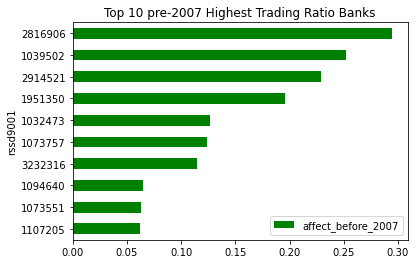

In [8]:
top_10_before_highest_2007.sort_values('affect_before_2007', inplace=True, ascending=True) 
top_10_before_highest_2007.plot(kind='barh',x='rssd9001',y='affect_before_2007',color='green')
plt.title('Top 10 pre-2007 Highest Trading Ratio Banks')
plt.show()

In [9]:
df_combined_2007.sort_values('affect_before_2007', inplace=True, ascending=True) 
top_10_before_lowest_2007 = df_combined_2007.head(10)
top_10_before_lowest_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
1063,2938349,0.0,0.0,0.0,0
176,1083587,0.0,0.0,0.0,0
73,1056161,0.0,0.0,0.0,0
70,1055155,0.0,0.0,0.0,0
55,1050909,0.0,0.0,0.0,0
56,1051081,0.0,0.0,0.0,0
57,1051465,0.0,0.0,0.0,0
58,1051979,0.0,0.0,0.0,0
59,1052220,0.0,0.0,0.0,0
60,1052378,0.0,0.0,0.0,0


# TOP 10 BANKS HIGHEST PRE-2007 TRADING RATIO

In [10]:
top_10_before_highest_2007['top10'] = 1
top_10_before_highest_2007

<ipython-input-10-29960daf6492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_before_highest_2007['top10'] = 1


,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007,top10
270,1107205,0.062361,0.011672,-0.050689,1,1
130,1073551,0.062608,0.049926,-0.012682,1,1
209,1094640,0.064513,0.055355,-0.009158,1,1
1179,3232316,0.114513,0.140699,0.026187,1,1
131,1073757,0.124046,0.134098,0.010052,1,1
35,1032473,0.126654,0.027572,-0.099082,1,1
725,1951350,0.196038,0.188989,-0.007048,1,1
1054,2914521,0.228753,0.195892,-0.032860,1,1
40,1039502,0.251748,0.215092,-0.036656,1,1
1008,2816906,0.294126,0.312166,0.018039,1,1


In [11]:
top10_connector = top_10_before_highest_2007[['rssd9001','top10']]
top10_connector

,rssd9001,top10
270,1107205,1
130,1073551,1
209,1094640,1
1179,3232316,1
131,1073757,1
35,1032473,1
725,1951350,1
1054,2914521,1
40,1039502,1
1008,2816906,1


# BOTTOM 10 BANKS - LOWEST TRADING RATIO PRE-2007

In [12]:
top_10_before_lowest_2007['btm10'] = 1
top_10_before_lowest_2007

<ipython-input-12-1e165bde801e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_before_lowest_2007['btm10'] = 1


,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007,btm10
1063,2938349,0.0,0.0,0.0,0,1
176,1083587,0.0,0.0,0.0,0,1
73,1056161,0.0,0.0,0.0,0,1
70,1055155,0.0,0.0,0.0,0,1
55,1050909,0.0,0.0,0.0,0,1
56,1051081,0.0,0.0,0.0,0,1
57,1051465,0.0,0.0,0.0,0,1
58,1051979,0.0,0.0,0.0,0,1
59,1052220,0.0,0.0,0.0,0,1
60,1052378,0.0,0.0,0.0,0,1


In [13]:
btm10_connector = top_10_before_lowest_2007[['rssd9001','btm10']]
btm10_connector

,rssd9001,btm10
1063,2938349,1
176,1083587,1
73,1056161,1
70,1055155,1
55,1050909,1
56,1051081,1
57,1051465,1
58,1051979,1
59,1052220,1
60,1052378,1


In [14]:
df_btm10 = df.merge(btm10_connector, on='rssd9001', how='left').reset_index(drop = True)
df_top10 = df.merge(top10_connector, on='rssd9001', how='left').reset_index(drop = True)

df_btm10['btm10'] = df_btm10['btm10'].fillna(0).astype(np.int64)
df_top10['top10'] = df_top10['top10'].fillna(0).astype(np.int64)

In [15]:
# fuck it just put it in one dataframe
df_merged = df_btm10
df_merged['top10']  = df_top10['top10']

In [16]:
df_btm10

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,date_parsed,after_2007,btm10,top10
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,2004-09-30,0,0,0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,2004-12-31,0,0,0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,2005-03-31,0,0,0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,2005-06-30,0,0,0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,2005-09-30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,2014-03-31,1,0,0
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,2014-06-30,1,0,0
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,2014-09-30,1,0,0
40024,3832583,20141231,0.0,0,1,0.006423,0.227009,13.552240,0.008406,0.473358,0.709474,0.001760,0.074139,0,2014-12-31,1,0,0


In [17]:
df_top10

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,date_parsed,after_2007,top10
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,2004-09-30,0,0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,2004-12-31,0,0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,2005-03-31,0,0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,2005-06-30,0,0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,2005-09-30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,2014-03-31,1,0
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,2014-06-30,1,0
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,2014-09-30,1,0
40024,3832583,20141231,0.0,0,1,0.006423,0.227009,13.552240,0.008406,0.473358,0.709474,0.001760,0.074139,0,2014-12-31,1,0


In [18]:
df_top10.dtypes

rssd9001                          int64
rssd9999                          int64
bhc_avgtradingratio             float64
treat_3_b_avg                     int64
after_DFA_1                       int64
dep_roa1                        float64
dep_leverage                    float64
dep_lnassets                    float64
dep_creditrisk_total3           float64
dep_cir                         float64
dep_depositratio                float64
dep_loans_REratio               float64
dep_liquidity                   float64
dep_cpp_bankquarter               int64
date_parsed              datetime64[ns]
after_2007                        int64
top10                             int64
dtype: object

In [19]:
df_merged

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter,date_parsed,after_2007,btm10,top10
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,2004-09-30,0,0,0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,2004-12-31,0,0,0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,2005-03-31,0,0,0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,2005-06-30,0,0,0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,2005-09-30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,2014-03-31,1,0,0
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,2014-06-30,1,0,0
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,2014-09-30,1,0,0
40024,3832583,20141231,0.0,0,1,0.006423,0.227009,13.552240,0.008406,0.473358,0.709474,0.001760,0.074139,0,2014-12-31,1,0,0


In [20]:
df_merged = df_merged.set_index(['rssd9001', 'date_parsed'])
df_merged

rssd9999  bhc_avgtradingratio  treat_3_b_avg  \
rssd9001 date_parsed                                                 
1020180  2004-09-30   20040930                  0.0              0   
         2004-12-31   20041231                  0.0              0   
         2005-03-31   20050331                  0.0              0   
         2005-06-30   20050630                  0.0              0   
         2005-09-30   20050930                  0.0              0   
...                        ...                  ...            ...   
3832583  2014-03-31   20140331                  0.0              0   
         2014-06-30   20140630                  0.0              0   
         2014-09-30   20140930                  0.0              0   
         2014-12-31   20141231                  0.0              0   
3836442  2009-06-30   20090630                  0.0              0   

                      after_DFA_1  dep_roa1  dep_leverage  dep_lnassets  \
rssd9001 date_parsed                                                      
1020180  2004-09-30             0  0.002772      0.081957     15.601202   
         2004-12-31             0  0.003045      0.082480     15.630583   
         2005-03-31             0  0.002616      0.082074     15.644925   
         2005-06-30             0  0.002647      0.081712     15.679702   
         2005-09-30             0  0.002867      0.082944     15.661868   
...                           ...       ...           ...           ...   
3832583  2014-03-31             1  0.006362      0.225532     13.525286   
         2014-06-30             1  0.006616      0.224154     13.519756   
         2014-09-30             1  0.006579      0.226952     13.523643   
         2014-12-31             1  0.006423      0.227009     13.552240   
3836442  2009-06-30             0 -0.006128      0.050489     13.462799   

                      dep_creditrisk_total3   dep_cir  dep_depositratio  \
rssd9001 date_parsed                                                      
1020180  2004-09-30                0.013304  0.463811          0.561805   
         2004-12-31                0.009732  0.456392          0.557617   
         2005-03-31                0.011830  0.444011          0.556980   
         2005-06-30                0.013654  0.433771          0.571642   
         2005-09-30                0.012456  0.400985          0.577408   
...                                     ...       ...               ...   
3832583  2014-03-31                0.008318  0.528542          0.720636   
         2014-06-30                0.007821  0.490698          0.724049   
         2014-09-30                0.008012  0.469434          0.716915   
         2014-12-31                0.008406  0.473358          0.709474   
3836442  2009-06-30                0.070051  0.373026          0.615129   

                      dep_loans_REratio  dep_liquidity  dep_cpp_bankquarter  \
rssd9001 date_parsed                                                          
1020180  2004-09-30            0.593738       0.024337                    0   
         2004-12-31            0.601763       0.025446                    0   
         2005-03-31            0.600700       0.025153                    0   
         2005-06-30            0.601042       0.023670                    0   
         2005-09-30            0.581438       0.029793                    0   
...                                 ...            ...                  ...   
3832583  2014-03-31            0.001986       0.081983                    0   
         2014-06-30            0.002048       0.084540                    0   
         2014-09-30            0.001870       0.075759                    0   
         2014-12-31            0.001760       0.074139                    0   
3836442  2009-06-30            0.959304       0.016958                    0   

                      after_2007  btm10  top10  
rssd9001 date_parsed                            
1020180  2004-09-30            0 

In [21]:
df_merged['dfa_top10'] = df_merged['after_DFA_1'] * df_merged['top10']
df_merged['dfa_btm10'] = df_merged['after_DFA_1'] * df_merged['btm10']

## First baseline model for top 10 using PanelOLS

In [22]:
# get exogenous variables, with constants
selected_ratios = [
  'dep_roa1',
  'dep_leverage',
  'dep_lnassets',
  'dep_creditrisk_total3',
  'dep_cir',
  'dep_depositratio',
  'dep_loans_REratio',
  'dep_liquidity',
  'dep_cpp_bankquarter',
    'dfa_top10'
]

exog = sm.add_constant(df_merged[selected_ratios])

In [23]:
# instantiate model
fixed_effects = lm.PanelOLS(
  dependent=df_merged['bhc_avgtradingratio'],
  exog=exog,
  entity_effects = True,
  time_effects=True,
  drop_absorbed=True,
)

In [24]:
# fit model
result = fixed_effects.fit(
  cov_type = 'clustered',
  cluster_entity=True,
)

In [25]:
result

Dep. Variable:,bhc_avgtradingratio,R-squared:,0.0462
Estimator:,PanelOLS,R-squared (Between):,-0.0380
No. Observations:,40026,R-squared (Within):,0.0443
Date:,"Wed, Oct 20 2021",R-squared (Overall):,-0.0522
Time:,13:00:03,Log-likelihood,1.518e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,182.00
Entities:,2428,P-value,0.0000
Avg Obs:,16.485,Distribution:,"F(10,37551)"
Min Obs:,1.0000,,
Max Obs:,38.000,F-statistic (robust):,2.0384


### Main point: Top 10 trading banks pre-2007 decreased trading ratio by around 3% after DFA

## First baseline model for btm 10 using PanelOLS

In [26]:
# get exogenous variables, with constants
selected_ratios = [
  'dep_roa1',
  'dep_leverage',
  'dep_lnassets',
  'dep_creditrisk_total3',
  'dep_cir',
  'dep_depositratio',
  'dep_loans_REratio',
  'dep_liquidity',
  'dep_cpp_bankquarter',
    'dfa_btm10'
]

exog = sm.add_constant(df_merged[selected_ratios])

In [27]:
# instantiate model
fixed_effects = lm.PanelOLS(
  dependent=df_merged['bhc_avgtradingratio'],
  exog=exog,
  entity_effects = True,
  time_effects=True,
  drop_absorbed=True,
)

In [28]:
# fit model
result = fixed_effects.fit(
  cov_type = 'clustered',
  cluster_entity=True,
)

In [29]:
result

Dep. Variable:,bhc_avgtradingratio,R-squared:,0.0035
Estimator:,PanelOLS,R-squared (Between):,0.0098
No. Observations:,40026,R-squared (Within):,0.0027
Date:,"Wed, Oct 20 2021",R-squared (Overall):,0.0154
Time:,13:00:06,Log-likelihood,1.509e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,13.062
Entities:,2428,P-value,0.0000
Avg Obs:,16.485,Distribution:,"F(10,37551)"
Min Obs:,1.0000,,
Max Obs:,38.000,F-statistic (robust):,1.2342


### Main point: Bottom 10 trading banks pre-2007 slightly increased trading ratio by 0.0004 after DFA

## Maybe we can just use the C() thing for regression instead below?

### ^ Done; ran with C()

In [34]:
df_merged = df_merged.reset_index()

In [35]:
# Regression
baseline_top10_1 = ols('bhc_avgtradingratio ~ after_DFA_1*top10 + dep_lnassets + dep_leverage + dep_roa1 + dep_liquidity + dep_depositratio + dep_loans_REratio + dep_cir +dep_cpp_bankquarter + dep_creditrisk_total3 + C(rssd9001) + C(date_parsed)',df_merged).fit()
baseline_top10_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     bhc_avgtradingratio   R-squared:                       0.922
Model:                             OLS   Adj. R-squared:                  0.917
Method:                  Least Squares   F-statistic:                     180.2
Date:                 Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                         13:04:59   Log-Likelihood:             1.5176e+05
No. Observations:                40026   AIC:                        -2.986e+05
Df Residuals:                    37551   BIC:                        -2.773e+05
Df Model:                         2474                                         
Covariance Type:             nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0107      0.003      3.749      0.000       0.005       0.016
C(rssd9001)[T.1020201]                                 0.1368      0.003     53.831      0.000       0.132       0.142
C(rssd9001)[T.1020340]                                 0.0175      0.002     10.590      0.000       0.014       0.021
C(rssd9001)[T.1020395]                                 0.0003      0.003      0.134      0.893      -0.005       0.005
C(rssd9001)[T.1020582]                                 0.0008      0.003      0.317      0.751      -0.004       0.006
C(rssd9001)[T.1020676]                                 0.0001      0.001      0.091      0.928      -0.003       0.003
C(rssd9001)[T.1020902]                                 0.0133      0.001     10.166      0.000       0.011       0.016
C(rssd9001)[T.1020920]                                -0.0002      0.003     -0.091      0.927      -0.005       0.005
C(rssd9001)[T.1021570]                                -0.0038      0.003     -1.504      0.133      -0.009       0.001
C(rssd9001)[T.1021682]                             -1.691e-06      0.001     -0.001      0.999      -0.003       0.003
C(rssd9001)[T.1021879]                                -0.0009      0.002     -0.381      0.703      -0.006       0.004
C(rssd9001)[T.1022166]                                 0.0006      0.003      0.233      0.816      -0.004       0.006
C(rssd9001)[T.1022269]                                 0.0022      0.003      0.874      0.382      -0.003       0.007
C(rssd9001)[T.1022764]                                 0.0017      0.001      1.314      0.189      -0.001       0.004
C(rssd9001)[T.1022997]                                 0.0023      0.003      0.913      0.361      -0.003       0.007
C(rssd9001)[T.1023154]                                 0.0019      0.001      1.297      0.195      -0.001       0.005
C(rssd9001)[T.1023239]                                 0.0013      0.001      0.986      0.324      -0.001       0.004
C(rssd9001)[T.1025309]                                 0.0052      0.001      3.986      0.000       0.003       0.008
C(rssd9001)[T.1025541]                                -0.0003      0.001     -0.214      0.830      -0.003       0.002
C(rssd9001)[T.1025608]                                 0.0029      0.001      2.167      0.030       0.000       0.006
C(rssd9001)[T.1025662]                                 0.0006      0.001      0.464      0.642      -0.002       0.003
C(rssd9001)[T.1026632]                                 0.0070      0.002      3.750      0.000       0.003       0.011
C(rssd9001)[T.1026801]                                 0.0029      0.001      2.206      0.027   

In [36]:
baseline_btm10_1 = ols('bhc_avgtradingratio ~ after_DFA_1*btm10 + dep_lnassets + dep_leverage + dep_roa1 + dep_liquidity + dep_depositratio + dep_loans_REratio + dep_cir +dep_cpp_bankquarter + dep_creditrisk_total3 + C(rssd9001) + C(date_parsed)',df_merged).fit()
baseline_btm10_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     bhc_avgtradingratio   R-squared:                       0.919
Model:                             OLS   Adj. R-squared:                  0.913
Method:                  Least Squares   F-statistic:                     171.9
Date:                 Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                         13:08:57   Log-Likelihood:             1.5088e+05
No. Observations:                40026   AIC:                        -2.968e+05
Df Residuals:                    37551   BIC:                        -2.755e+05
Df Model:                         2474                                         
Covariance Type:             nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0061      0.003      2.087      0.037       0.000       0.012
C(rssd9001)[T.1020201]                                 0.1356      0.003     52.209      0.000       0.131       0.141
C(rssd9001)[T.1020340]                                 0.0170      0.002     10.080      0.000       0.014       0.020
C(rssd9001)[T.1020395]                                 0.0008      0.003      0.314      0.754      -0.004       0.006
C(rssd9001)[T.1020582]                                 0.0013      0.003      0.490      0.624      -0.004       0.006
C(rssd9001)[T.1020676]                                 0.0006      0.001      0.411      0.681      -0.002       0.003
C(rssd9001)[T.1020902]                                 0.0136      0.001     10.118      0.000       0.011       0.016
C(rssd9001)[T.1020920]                                 0.0004      0.003      0.148      0.882      -0.005       0.005
C(rssd9001)[T.1021570]                                -0.0025      0.003     -0.952      0.341      -0.008       0.003
C(rssd9001)[T.1021682]                                 0.0005      0.001      0.324      0.746      -0.002       0.003
C(rssd9001)[T.1021879]                                -0.0001      0.002     -0.060      0.952      -0.005       0.005
C(rssd9001)[T.1022166]                                 0.0011      0.003      0.412      0.680      -0.004       0.006
C(rssd9001)[T.1022269]                                 0.0026      0.003      0.974      0.330      -0.003       0.008
C(rssd9001)[T.1022764]                                 0.0015      0.001      1.162      0.245      -0.001       0.004
C(rssd9001)[T.1022997]                                 0.0024      0.003      0.926      0.355      -0.003       0.007
C(rssd9001)[T.1023154]                                 0.0020      0.001      1.326      0.185      -0.001       0.005
C(rssd9001)[T.1023239]                                 0.0013      0.001      0.982      0.326      -0.001       0.004
C(rssd9001)[T.1025309]                                 0.0048      0.001      3.639      0.000       0.002       0.007
C(rssd9001)[T.1025541]                                -0.0001      0.001     -0.091      0.928      -0.003       0.002
C(rssd9001)[T.1025608]                                 0.0026      0.001      1.855      0.064      -0.000       0.005
C(rssd9001)[T.1025662]                                 0.0011      0.001      0.797      0.426      -0.002       0.004
C(rssd9001)[T.1026632]                                 0.0069      0.002      3.619      0.000       0.003       0.011
C(rssd9001)[T.1026801]                                 0.0026      0.001      1.937      0.053   